In [1]:
import tensorflow_core as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def split_dataset(x_dataset, y_dataset, ratio):
    arr = np.arange(x_dataset.size)
    np.random.shuffle(arr)
    num_train = int(ratio * x_dataset.size)
    x_train = x_dataset[arr[0:num_train]]
    x_test = x_dataset[arr[num_train:x_dataset.size]]
    y_train = y_dataset[arr[0:num_train]]
    y_test = y_dataset[arr[num_train:x_dataset.size]]
    return x_train, x_test, y_train, y_test

In [3]:
x_label0 = np.random.normal(5, 1, 30)
x_label1 = np.random.normal(2, 1, 40)
x_dataset = np.append(x_label0, x_label1)

y_dataset = \
    np.array([0.] * len(x_label0) \
    + [1.] * len(x_label1))

(x_train, x_test, y_train, y_test) = \
    split_dataset(x_dataset, y_dataset, 0.7)

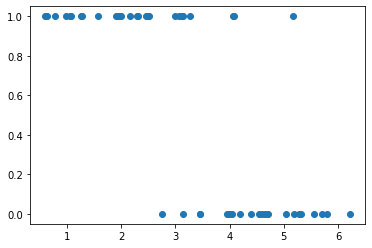

In [4]:
plt.scatter(x_train, y_train)

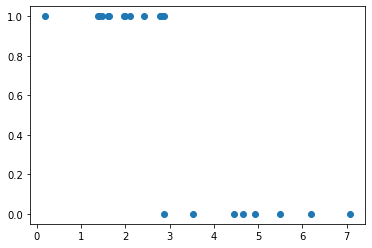

In [5]:
plt.scatter(x_test, y_test)

In [6]:
def model(X, w):
    return tf.add(tf.multiply(w[1], tf.pow(X, 1)), tf.multiply(w[0], tf.pow(X, 0)))

X = tf.placeholder(tf.float32, name="x")
Y = tf.placeholder(tf.float32, name="y")
reg_lambda = tf.placeholder(tf.float32, name="reg")

w = tf.Variable([0.0, 0.0], name="parameters")
y_model = model(X, w)

learning_rate = 0.001
training_epochs = 1000

cost = tf.add(
    tf.reduce_mean(tf.square(Y - y_model)),
    tf.multiply(reg_lambda, tf.reduce_sum(tf.square(w))),
)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
min_cost = x_dataset.size
final_w = np.array([0.0, 0.0])

sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for lambda_val in np.linspace(0, 1, 100):
    for epoch in range(training_epochs):
        sess.run(train_op, \
             feed_dict={X: x_train,\
                        Y: y_train,\
                        reg_lambda: lambda_val})
        
    testing_cost = sess.run(cost,\
            feed_dict={X: x_test,\
                        Y: y_test,\
                        reg_lambda: lambda_val})
    if testing_cost <= min_cost:
        min_cost = testing_cost
        final_w = sess.run(w)

    w.assign([0.] * 2) # reset parameters

sess.close()

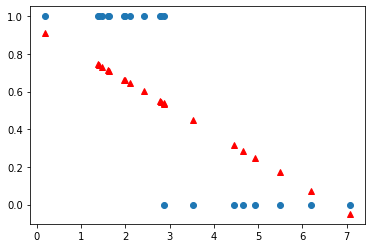

In [8]:
plt.scatter(x_test, y_test)
plt.plot(x_test, x_test * final_w[1] + final_w[0], 'r^')
plt.show()

In [9]:
def comparePrediction(y_feed, y_predict):
    if y_predict < 0.5: y_predict = 0.0
    elif y_predict > 0.5: y_predict = 1.0
    
    return y_predict == y_feed

def calculate_accuracy(x_dataset, y_dataset, w_val):
    acc = 0
    for ind, x in enumerate(x_dataset):
        y_predict = x * w_val[1] + w_val[0]

        if comparePrediction(y_dataset[ind], y_predict):
            acc += 1

    return acc / len(x_dataset) * 100

print(f"Testing accuracy {calculate_accuracy(x_test, y_test, final_w)} %")

Testing accuracy 95.23809523809523 %
